In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import warnings
import json
import sys
import tikzplotlib # for saving figures to tikz files -- remove at will
import xarray as xr

In [5]:
# Load-in data
directory_overview_data = 'longrunmip_figs/overview_data'
with open(directory_overview_data + '/comparison_errors.json') as json_file:
    comparison_errors = json.load(json_file)

In [9]:
comparison_times = [150,300,500]

In [11]:
comparison_errors['CCSM3']

[{'name': 'raw simulation value',
  'color': 'red',
  'marker': 'X',
  't': [150, 300, 500],
  'rem_err': [0.4023020700362681, 0.36219818881173416, 0.2803762773053413]},
 {'name': 'Gregory',
  'color': 'blue',
  'marker': 'o',
  't': [150, 300, 500],
  'rem_err': [0.10996397311449488, 0.08713214624189344, 0.07212706672207436]},
 {'name': 'Gregory (ignoring y1-20)',
  'color': 'yellow',
  'marker': 's',
  't': [150, 300, 500],
  'rem_err': [0.05057332107572878, 0.0472699462618581, 0.04150513178454297]},
 {'name': 'Double Gregory',
  'color': 'green',
  'marker': 'D',
  't': [150, 300, 500],
  'rem_err': [0.05642181708728007, 0.050375794686433835, 0.04413824978708188]},
 {'name': 'System Fit [T,ALB]',
  'color': 'cyan',
  'marker': '<',
  't': [150, 300, 500],
  'rem_err': [29.859199257900933, 29.859199257900933, 29.859199257900933]},
 {'name': 'System Fit [T,EMM]',
  'color': 'black',
  'marker': '>',
  't': [150, 300, 500],
  'rem_err': [0.12465952343960013,
   0.032692495690240665,
  

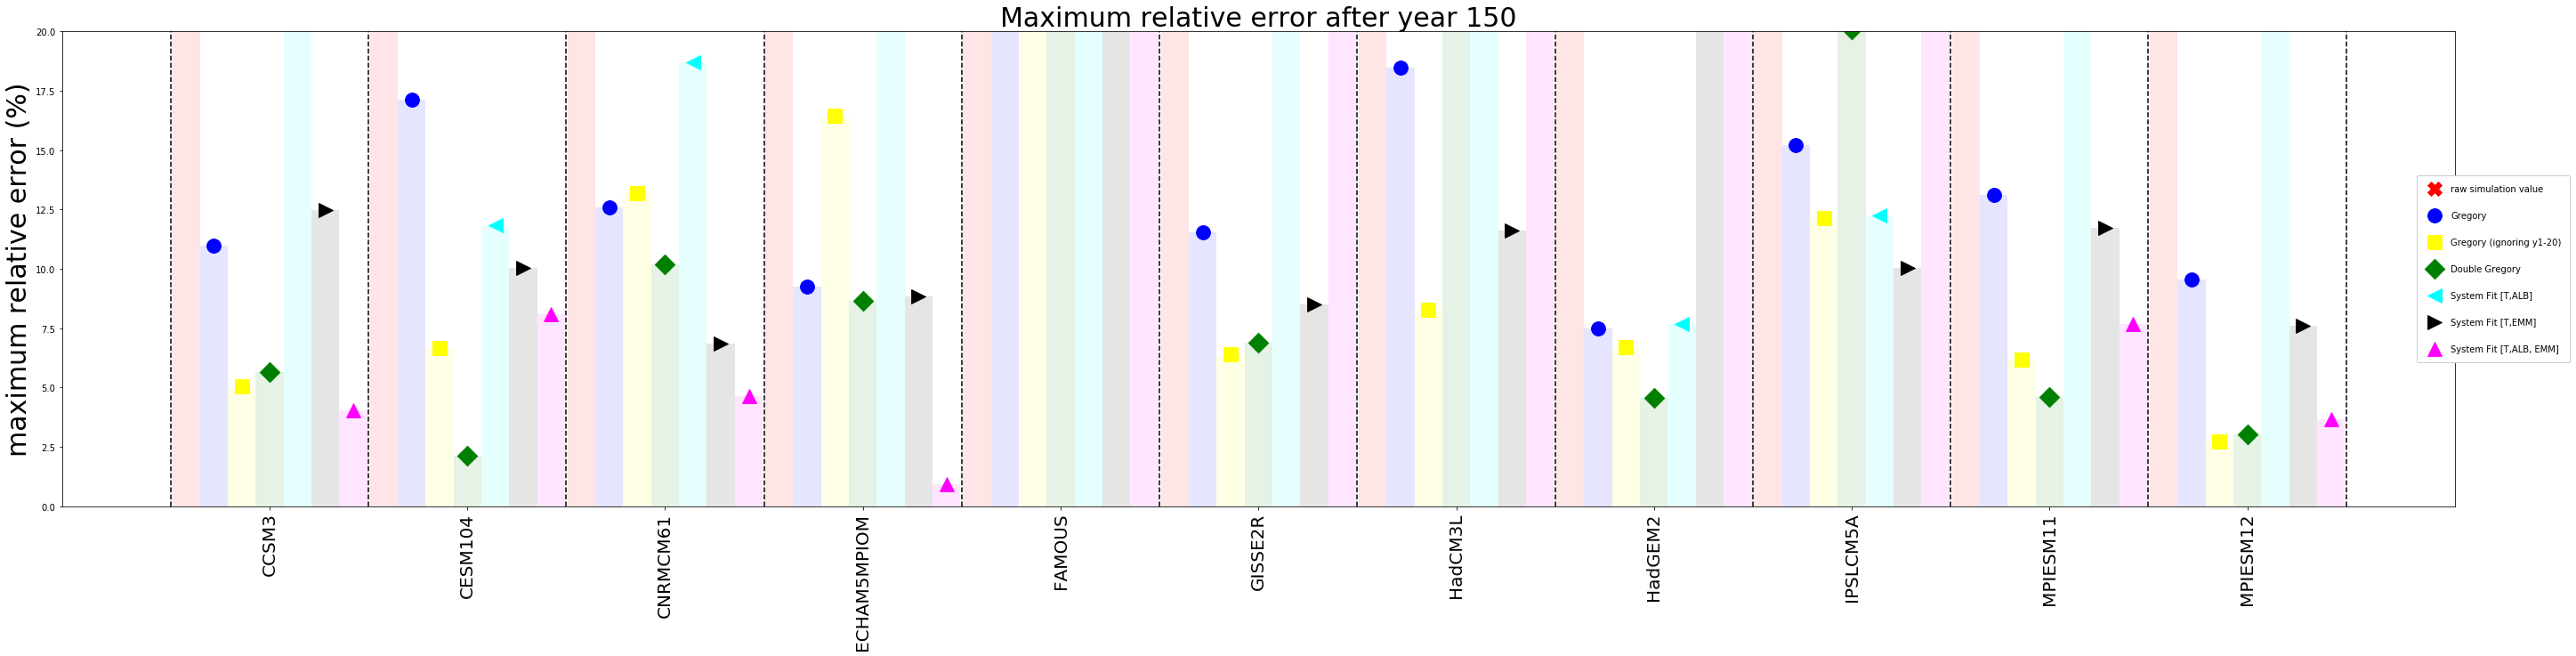

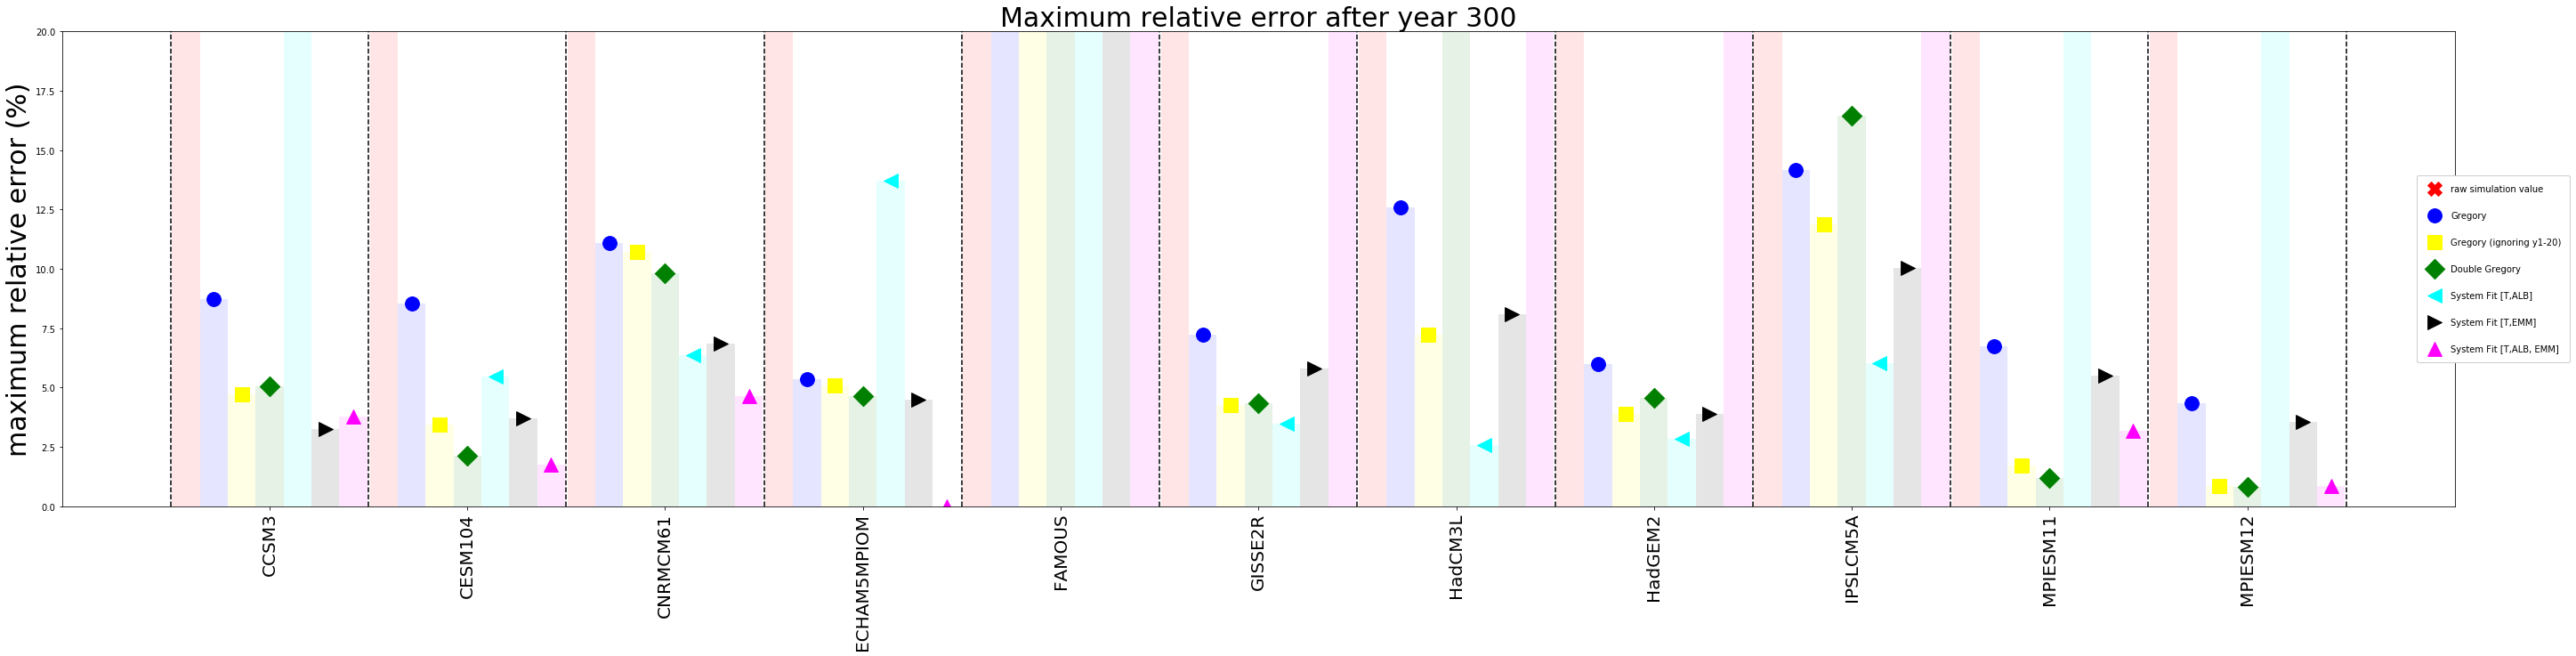

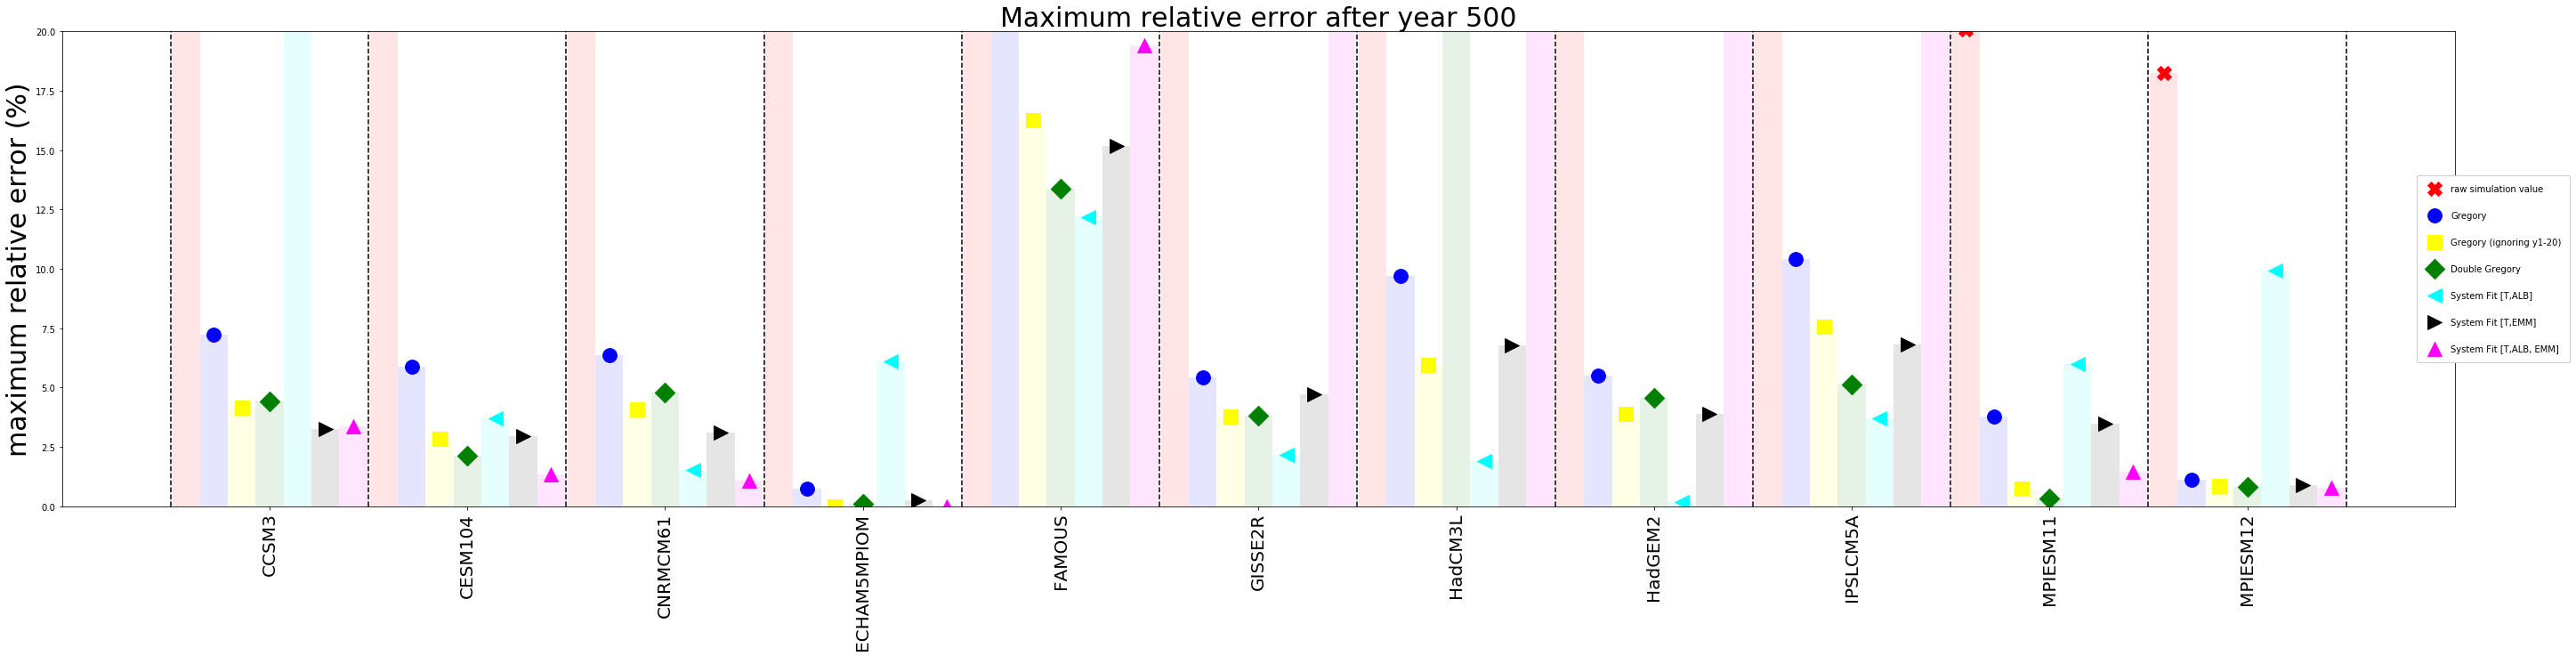

In [8]:
# Figure options
width = 0.141 # Based on 7 estimation techniques (= 1/7)
x_width = 1 # for scaling
bar_alpha = 0.10 # shading of bars
s_marker = 250 # size of markers

# Loop over all times in comparison times
for i,time in enumerate(comparison_times):

    # Figure initialisation
    fig = plt.figure(figsize = (40,10))
    ax = fig.add_subplot(111)
    
    names = [] # For x-labels
    ind1 = 0 # tracker for tracking number of models

    # Loop over all models
    for name in comparison_errors.keys():
        names.append(name)
        ind2 = -3 # index for tracking number of technique; should start at number of (techniques-1)/2 for nice figures
        
        # Loop over all techniques
        # NOTE: times 100 since we are now displaying the percentage!
        for technique in comparison_errors[name]:
            ax.bar(ind1*x_width + ind2 * width, 100*technique['rem_err'][i], width, color = technique['color'], alpha = bar_alpha)
            if(ind1 == 0):
                ax.scatter(ind1*x_width + ind2 * width, 100*technique['rem_err'][i], color = technique['color'], marker = technique['marker'], s = s_marker, label = technique['name'])
            else: # To prevent double legend entries
                ax.scatter(ind1*x_width + ind2 * width, 100*technique['rem_err'][i], color = technique['color'], marker = technique['marker'], s = s_marker)
            ind2 = ind2 + 1
        ind1 = ind1 + 1
        
    plt.ylim([0,20])
    
    ind = np.arange(ind1)*x_width # number of models; for make-up of figure
    
    ax.set_xticks(ind)
    ax.set_xticklabels(names)
    
    ax.legend(loc = 'center right', bbox_to_anchor = (1.05, 0.5), fancybox = True, ncol = 1, framealpha = 1, facecolor = 'inherit', borderpad = 1, labelspacing = 2)
    
    ax.vlines(ind - 0.5*x_width, 0, 100, linestyles = 'dashed', colors = "k")
    ax.vlines(ind[-1] + 0.5*x_width, 0, 100, linestyles = 'dashed', colors = 'k')
    
    plt.ylabel('maximum relative error (%)', fontsize=30)
    plt.xticks(fontsize=20, rotation = 90);
    plt.tight_layout()
    plt.title('Maximum relative error after year ' + str(time), fontsize=30)
    
    plt.savefig('longrunmip_figs/' + 'remaining_error_after_year_' + str(time) + '.png', bbox_inches = 'tight')
    
    try:
        if not os.path.isdir('longrunmip_figs/tikz'):
            os.mkdir('longrunmip_figs/tikz')
        tikzplotlib.save('longrunmip_figs/tikz/remaining_error_after_year_' + str(time) + '.tikz')
    except:
        pass

In [14]:
## GENERAL DATA COLLECTION FUNCTION

def collect_data(comparison_errors, i):
    # Input: 
    # comparison_errors array
    # index i that we are currently interested in
    # Output:
    # four arrays with errors (minimum for system fit techniques) and array of names

    ## Now we hard code the methods and put data in arrays
    err1 = []
    err2 = []
    err3 = []
    err4 = []
    err5 = []
    err6 = []
    err7 = []
    
    names = []
    
    ### Collect data
    for name in comparison_errors.keys():
        names.append(name)
        for technique in comparison_errors[name]:
            n = technique['name']
            v = 100*technique['rem_err'][i] # times 100 for percentage (%)
            if n == 'raw simulation value':
                err1.append(v)
            elif n == 'Gregory':
                err2.append(v)
            elif n == 'Gregory (ignoring y1-20)':
                err3.append(v)
            elif n == 'Double Gregory':
                err4.append(v)
            elif n == 'System Fit [T,ALB]':
                err5.append(v)
            elif n == 'System Fit [T,EMM]':
                err6.append(v)
            elif n == 'System Fit [T,ALB, EMM]':
                err7.append(v)
    return err1, err2, err3, err4, err5, err6, err7, names

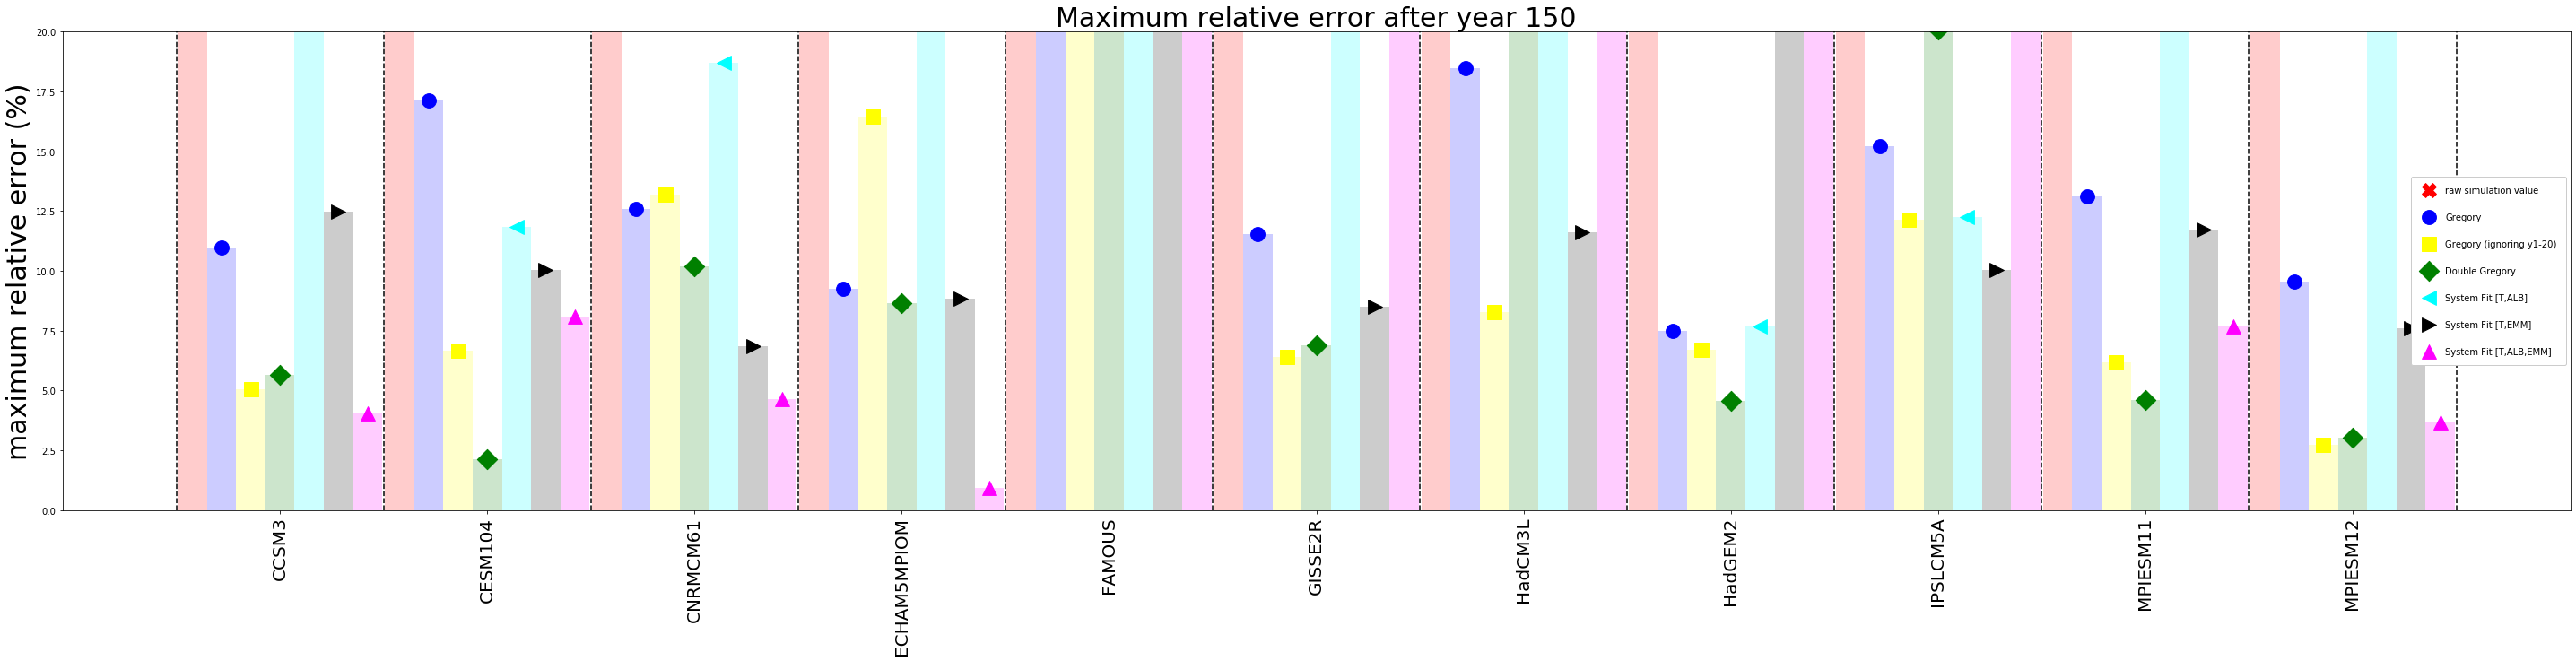

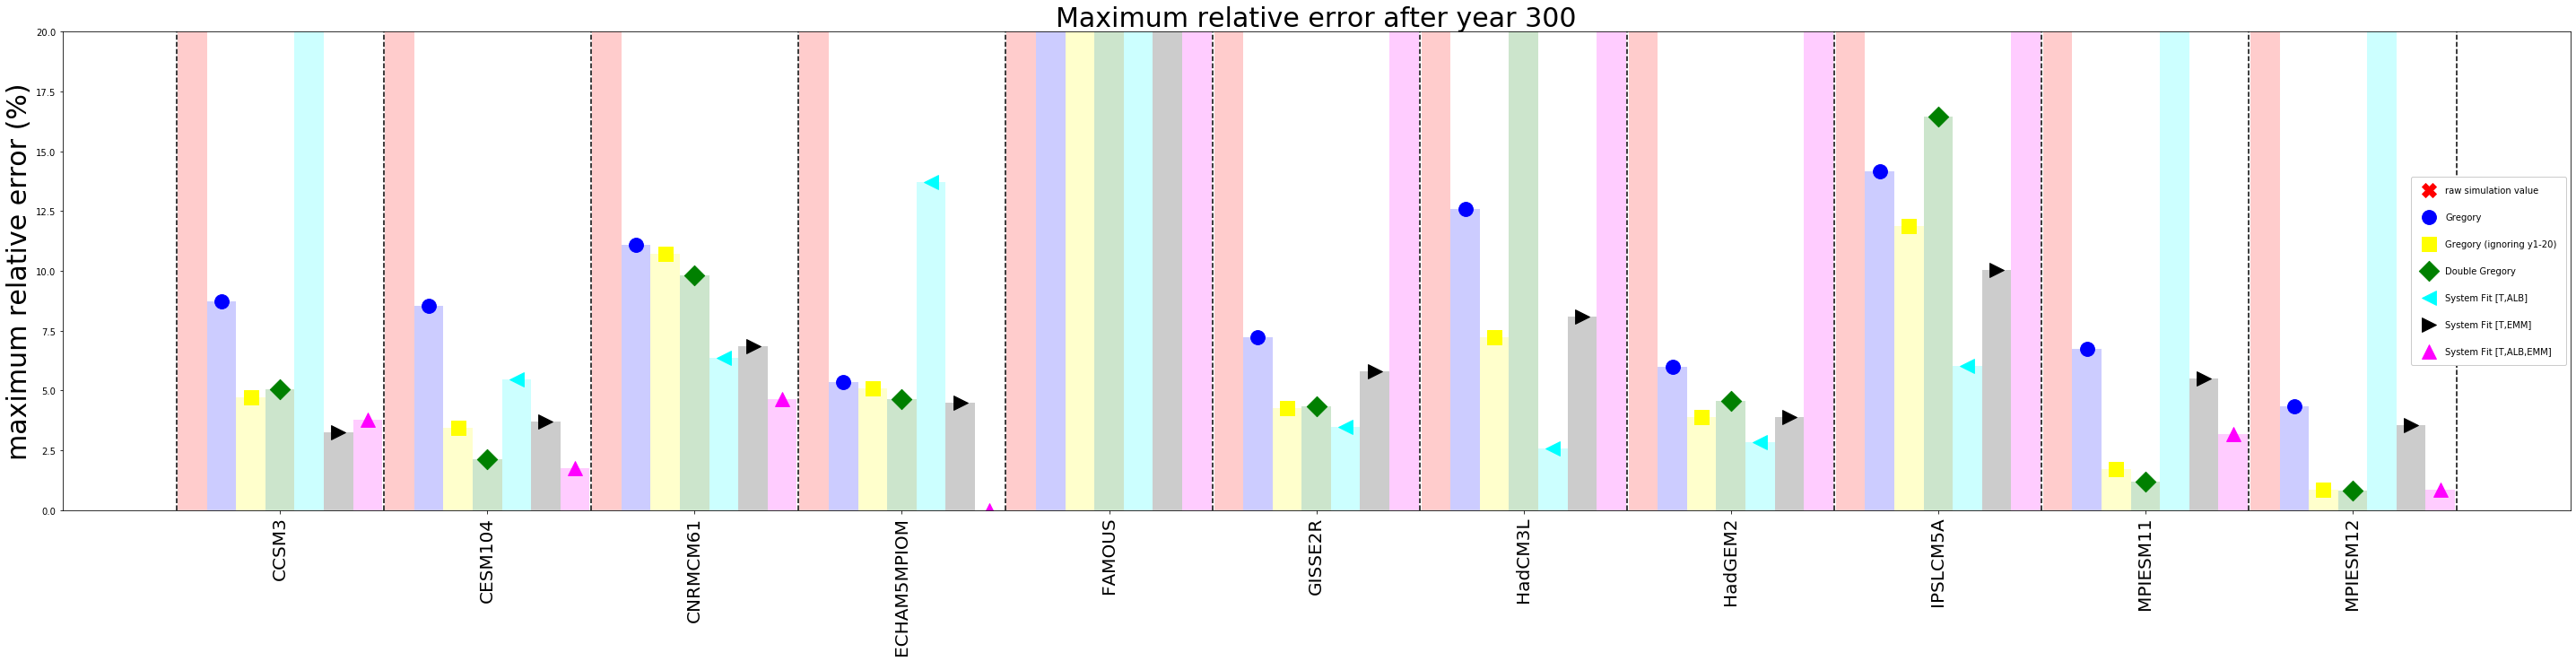

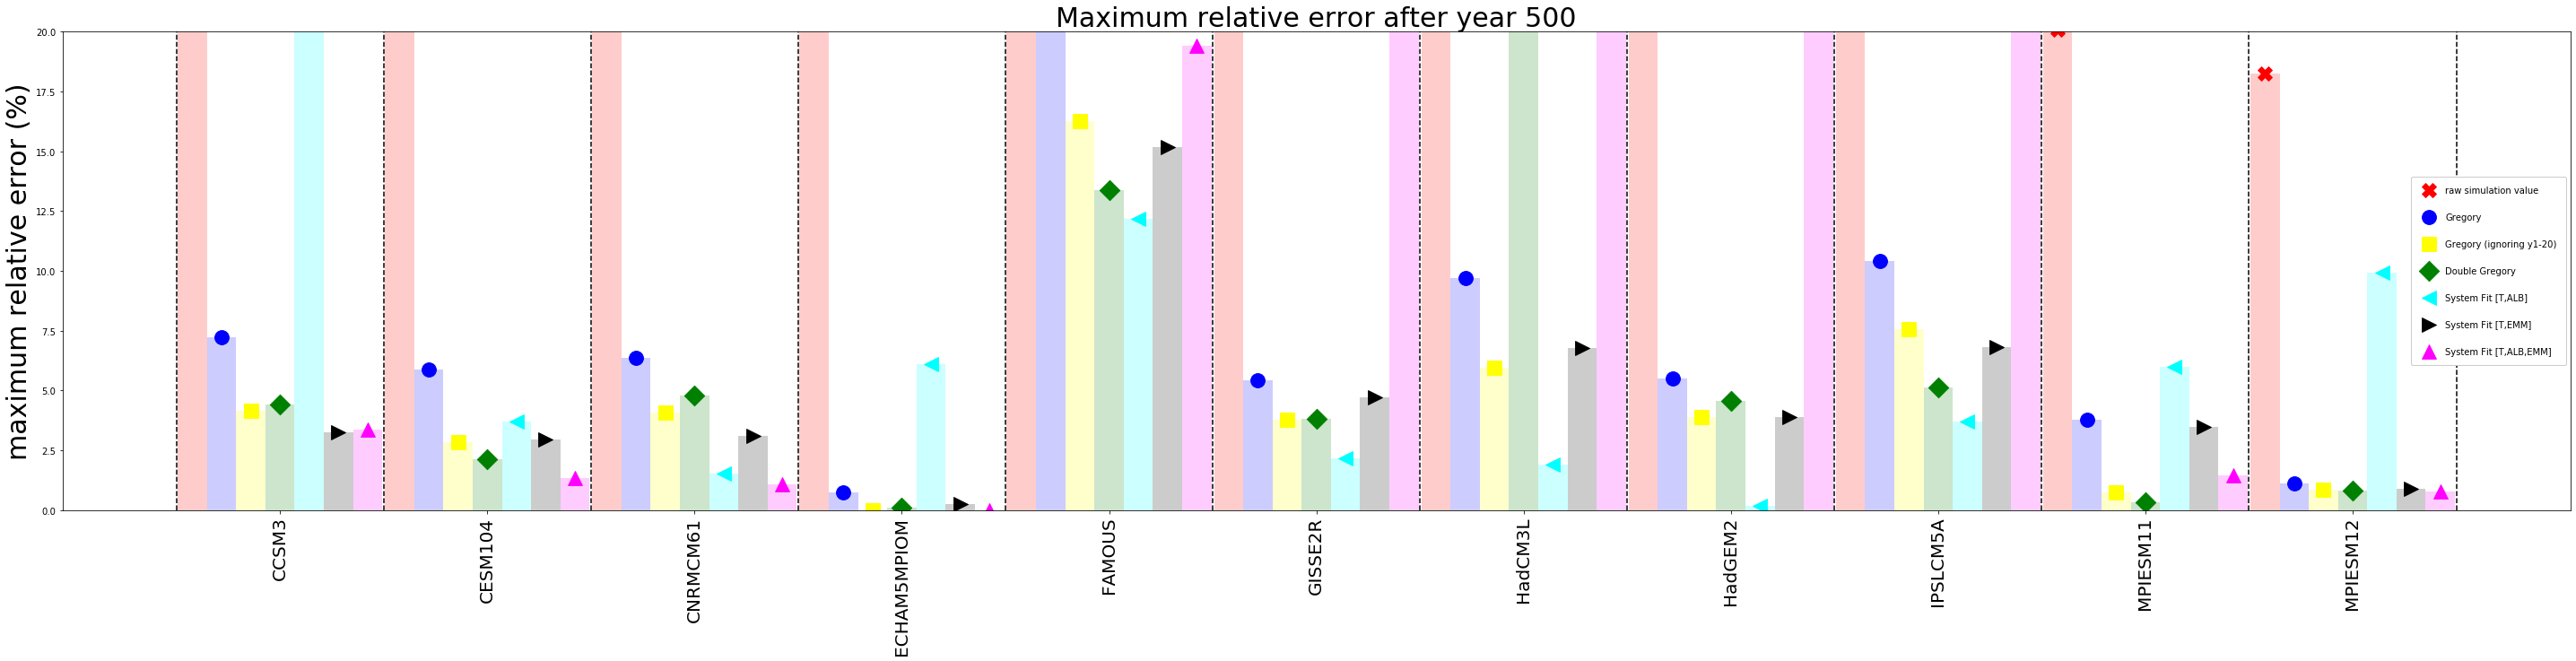

In [15]:
# Figure options
width = 0.141 # Based on 7 estimation techniques (= 1/7)
x_width = 1 # for scaling
bar_alpha = 0.20 # shading of bars
s_marker = 250 # size of markers


# Loop over all times in comparison_times
for i, time in enumerate(comparison_times):

    ### Collect data
    err1,err2,err3,err4,err5,err6,err7,names = collect_data(comparison_errors, i)
    
    
    ### Make Bar plot
    fig = plt.figure(figsize = (40,10))
    ax = fig.add_subplot(111)
    
    ind = np.arange(len(names)) * x_width
    
    # Make the bars
    ax.bar(ind - 3*width, err1, width, color = 'red', alpha = bar_alpha)
    ax.bar(ind - 2*width, err2, width, color = 'blue', alpha = bar_alpha)
    ax.bar(ind - 1*width, err3, width, color = 'yellow', alpha = bar_alpha)
    ax.bar(ind - 0*width, err4, width, color = 'green', alpha = bar_alpha)
    ax.bar(ind + 1*width, err5, width, color = 'cyan', alpha = bar_alpha)
    ax.bar(ind + 2*width, err6, width, color = 'black', alpha = bar_alpha)
    ax.bar(ind + 3*width, err7, width, color = 'magenta', alpha = bar_alpha)
    
    # Make the markers
    ax.scatter(ind - 3*width, err1, marker = 'X', s = s_marker, color = 'red', label = 'raw simulation value')
    ax.scatter(ind - 2*width, err2, marker = 'o', s = s_marker, color = 'blue', label = 'Gregory')
    ax.scatter(ind - 1*width, err3, marker = 's', s = s_marker, color = 'yellow', label = 'Gregory (ignoring y1-20)')
    ax.scatter(ind - 0*width, err4, marker = 'D', s = s_marker, color = 'green', label = 'Double Gregory')
    ax.scatter(ind + 1*width, err5, marker = '<', s = s_marker, color = 'cyan', label = 'System Fit [T,ALB]')
    ax.scatter(ind + 2*width, err6, marker = '>', s = s_marker, color = 'black', label = 'System Fit [T,EMM]')
    ax.scatter(ind + 3*width, err7, marker = '^', s = s_marker, color = 'magenta', label = 'System Fit [T,ALB,EMM]')
    
    plt.ylim([0, 20])
    ax.set_xticks(ind)
    ax.set_xticklabels( names )
            
    ax.legend(loc = 'center right', bbox_to_anchor = (1, 0.5), fancybox = True, ncol = 1, framealpha = 1, facecolor = 'inherit', borderpad = 1, labelspacing = 2)
    
    ax.vlines(ind - 0.5*x_width, 0, 100, linestyles = 'dashed', colors = "k")
    ax.vlines(ind[-1] + 0.5*x_width, 0, 100, linestyles = 'dashed', colors = 'k')
    
    plt.ylabel('maximum relative error (%)', fontsize=30)
    plt.xticks(fontsize=20, rotation = 90);
    plt.tight_layout()
    plt.title('Maximum relative error after year ' + str(time), fontsize=30)
    
    plt.savefig('longrunmip_figs/' + 'remaining_error_after_year_' + str(time) + '_v2.png', bbox_inches = 'tight')
    
    try:
        if not os.path.isdir('longrunmip_figs/tikz'):
            os.mkdir('longrunmip_figs/tikz')
        tikzplotlib.save('longrunmip_figs/tikz/remaining_error_after_year_' + str(time) + '_v2.tikz')
    except:
        pass
    